<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/ProjectUAS_PembelajaranMesin_Intan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

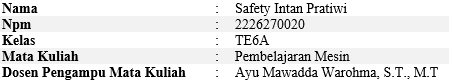



# **1.Study Kasus**
Ilmu Rekayasa: Kesehatan Jantung

# **2. Tujuan Machine Learning**

Permasalahan:

Bagaimana memprediksi kemungkinan seseorang mengalami penyakit jantung berdasarkan data klinis pasien, sehingga dokter bisa mengambil tindakan preventif lebih cepat.

Machine Learning digunakan untuk menyelesaikan:

Klasifikasi pasien ke dalam dua kelas:

1. 0 → Tidak ada penyakit jantung
2. 1 → Ada penyakit jantung

# **3. Dataset : Heart Failure Prediction Dataset**

# 4. **Exploratory Data Analysis (EDA)**
- deskripsi dataset
- data understanding,
- data characteristic Eda yang digunakan
- kesimpulan dari hasil visualisasi graphic

## Import Library

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Understanding

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [94]:
df.shape

(918, 12)

In [95]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [96]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [97]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [98]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [99]:
# Data Cleaning
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [100]:
df[df.duplicated]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [101]:
df.drop_duplicates(keep = 'first', inplace=True)

## Data Characteristic

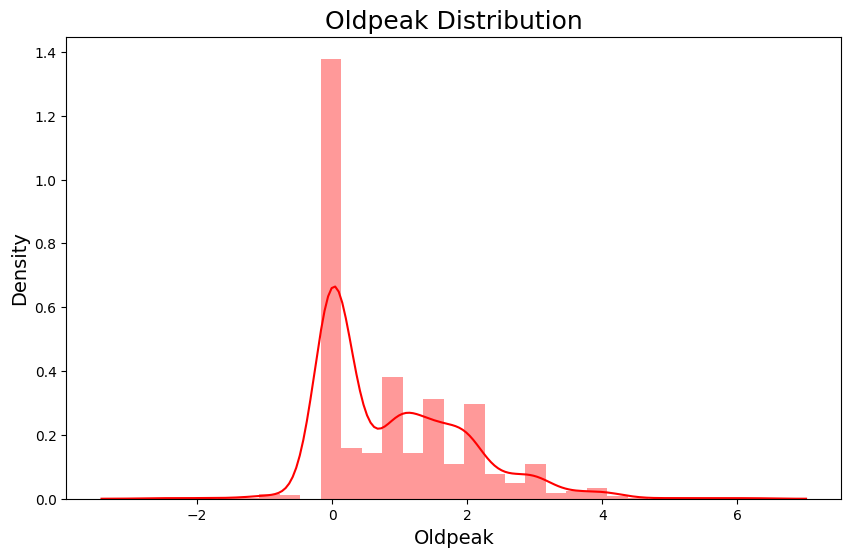

In [102]:
# Data Visualization
# Univariate Analysis
# Univariate Analysis for Numerical Features
plt.figure(figsize=(10,6))
sns.distplot(df.Oldpeak,color='r')
plt.title('Oldpeak Distribution',size=18)
plt.xlabel('Oldpeak',size=14)
plt.ylabel('Density',size=14)
plt.show()

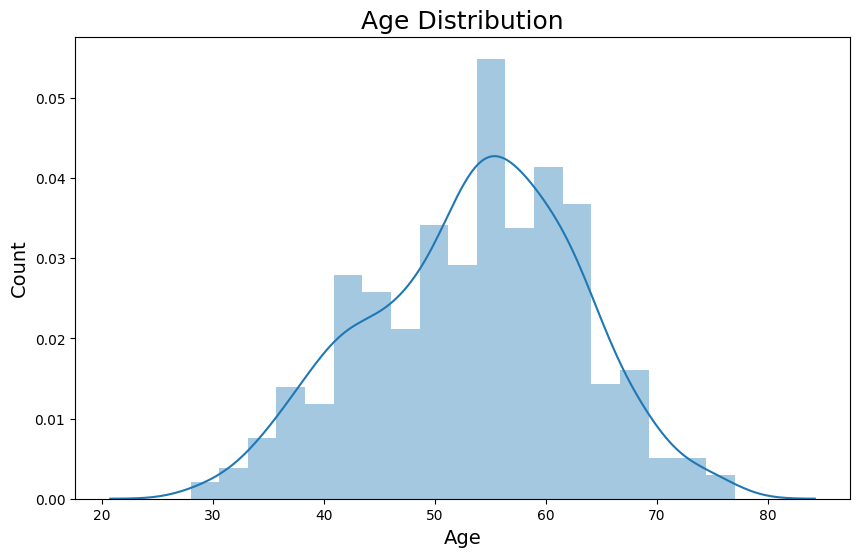

In [103]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'])
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

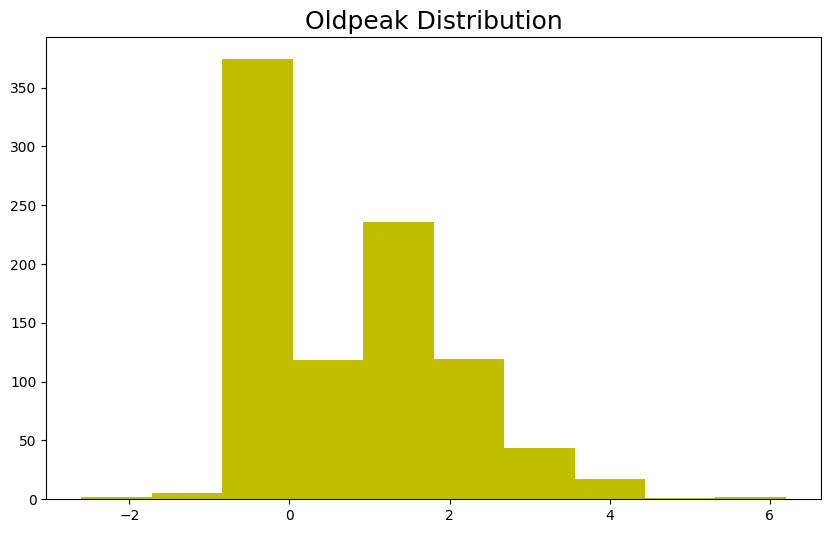

In [104]:
plt.figure(figsize=(10,6))
plt.hist(df.Oldpeak,color='y')
plt.title('Oldpeak Distribution',size=18)
plt.show()

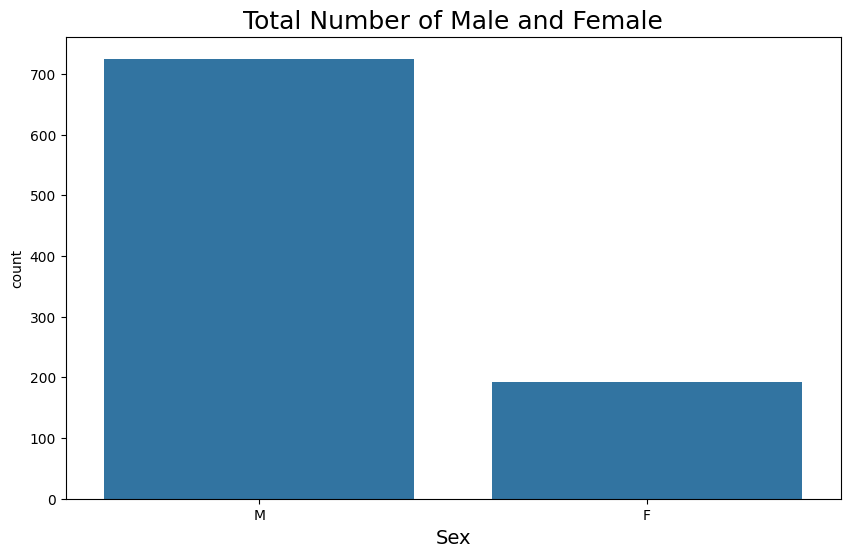

In [105]:
# Univariate Analysis for Categorical Features
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',data=df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

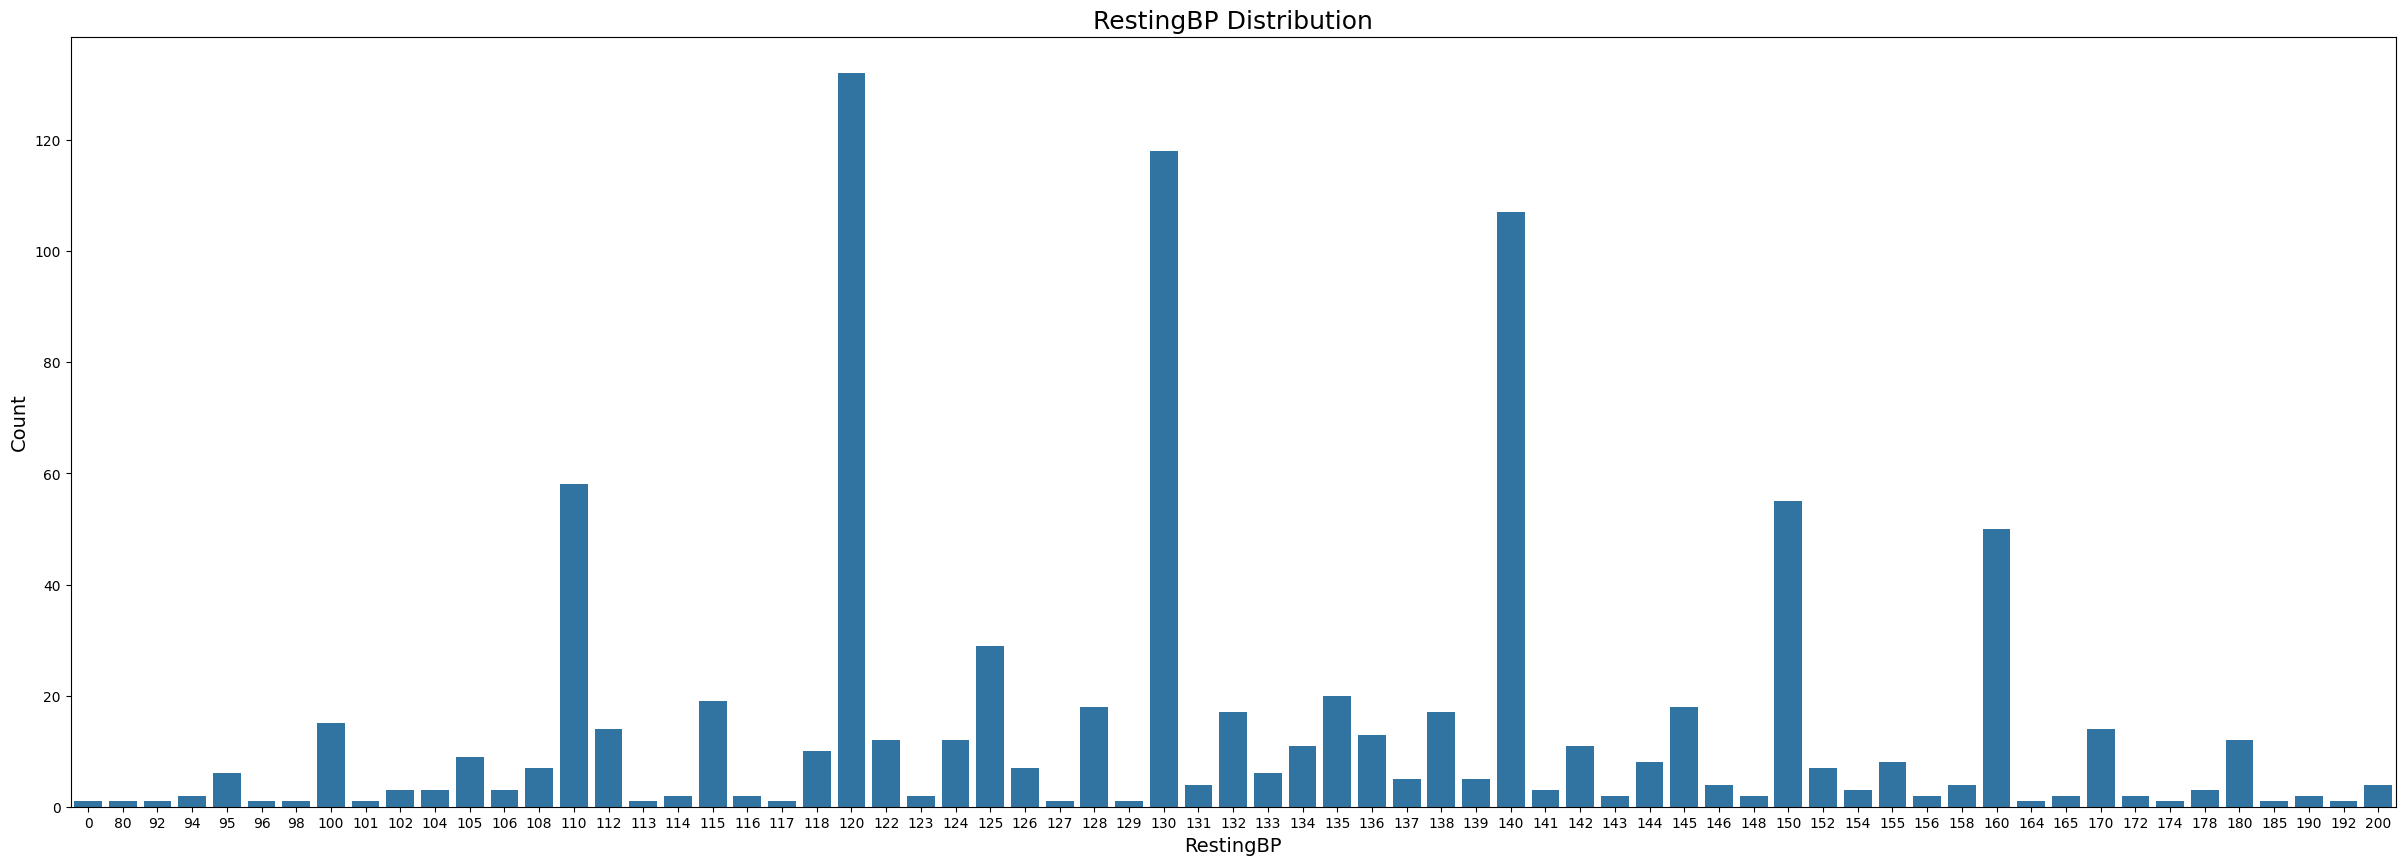

In [106]:
plt.figure(figsize=(30,10))
sns.countplot(x='RestingBP',data=df)
plt.title('RestingBP Distribution',size=18)
plt.xlabel('RestingBP',size=14)
plt.ylabel('Count',size=14)
plt.show()

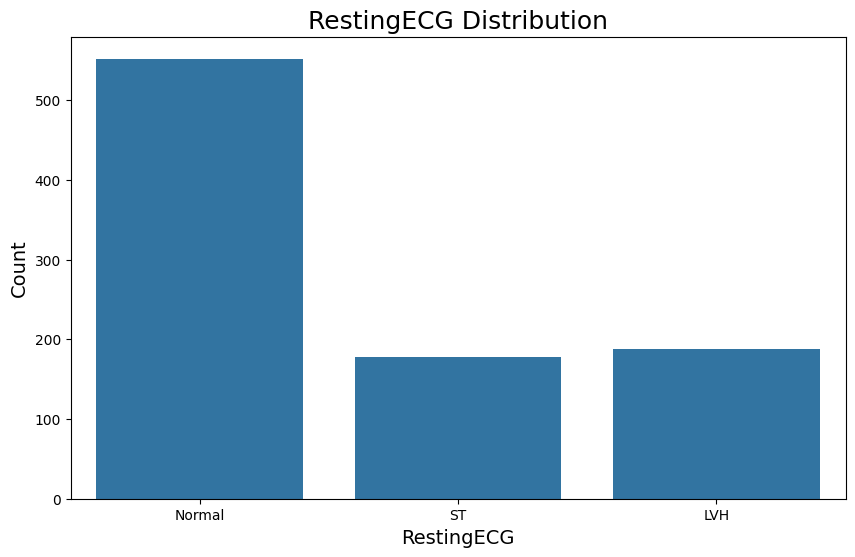

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(x='RestingECG',data=df)
plt.title('RestingECG Distribution',size=18)
plt.xlabel('RestingECG',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [108]:
df.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


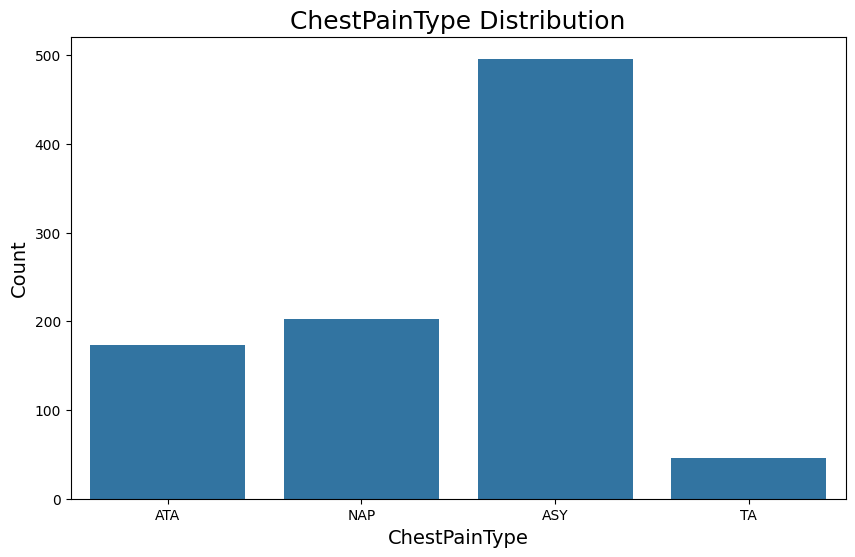

In [109]:
plt.figure(figsize=(10,6))
sns.countplot(x='ChestPainType',data=df)
plt.title('ChestPainType Distribution',size=18)
plt.xlabel('ChestPainType',size=14)
plt.ylabel('Count',size=14)
plt.show()

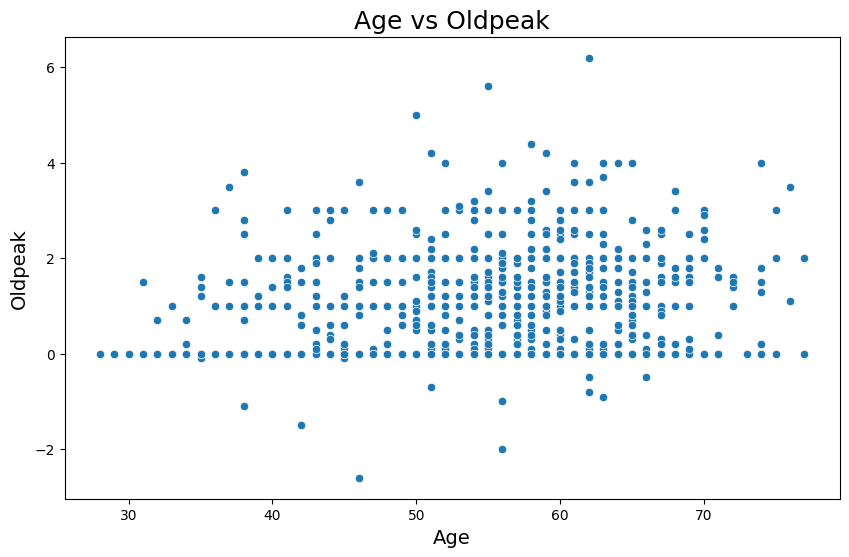

In [110]:
# Bivariate Analysis
# Age vs Oldpeak
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Oldpeak',data=df)
plt.title('Age vs Oldpeak',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Oldpeak',size=14)
plt.show()

Text(0.5, 1.0, 'RestingECG vs Oldpeak')

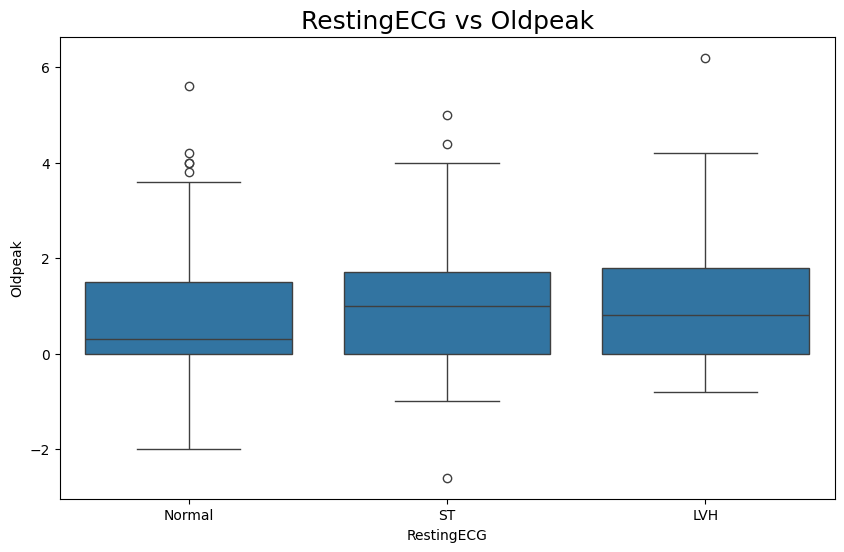

In [111]:
# RestingECG vs Oldpeak
plt.figure(figsize=(10,6))
sns.boxplot(x='RestingECG',y='Oldpeak',data=df)
plt.title('RestingECG vs Oldpeak',size=18)

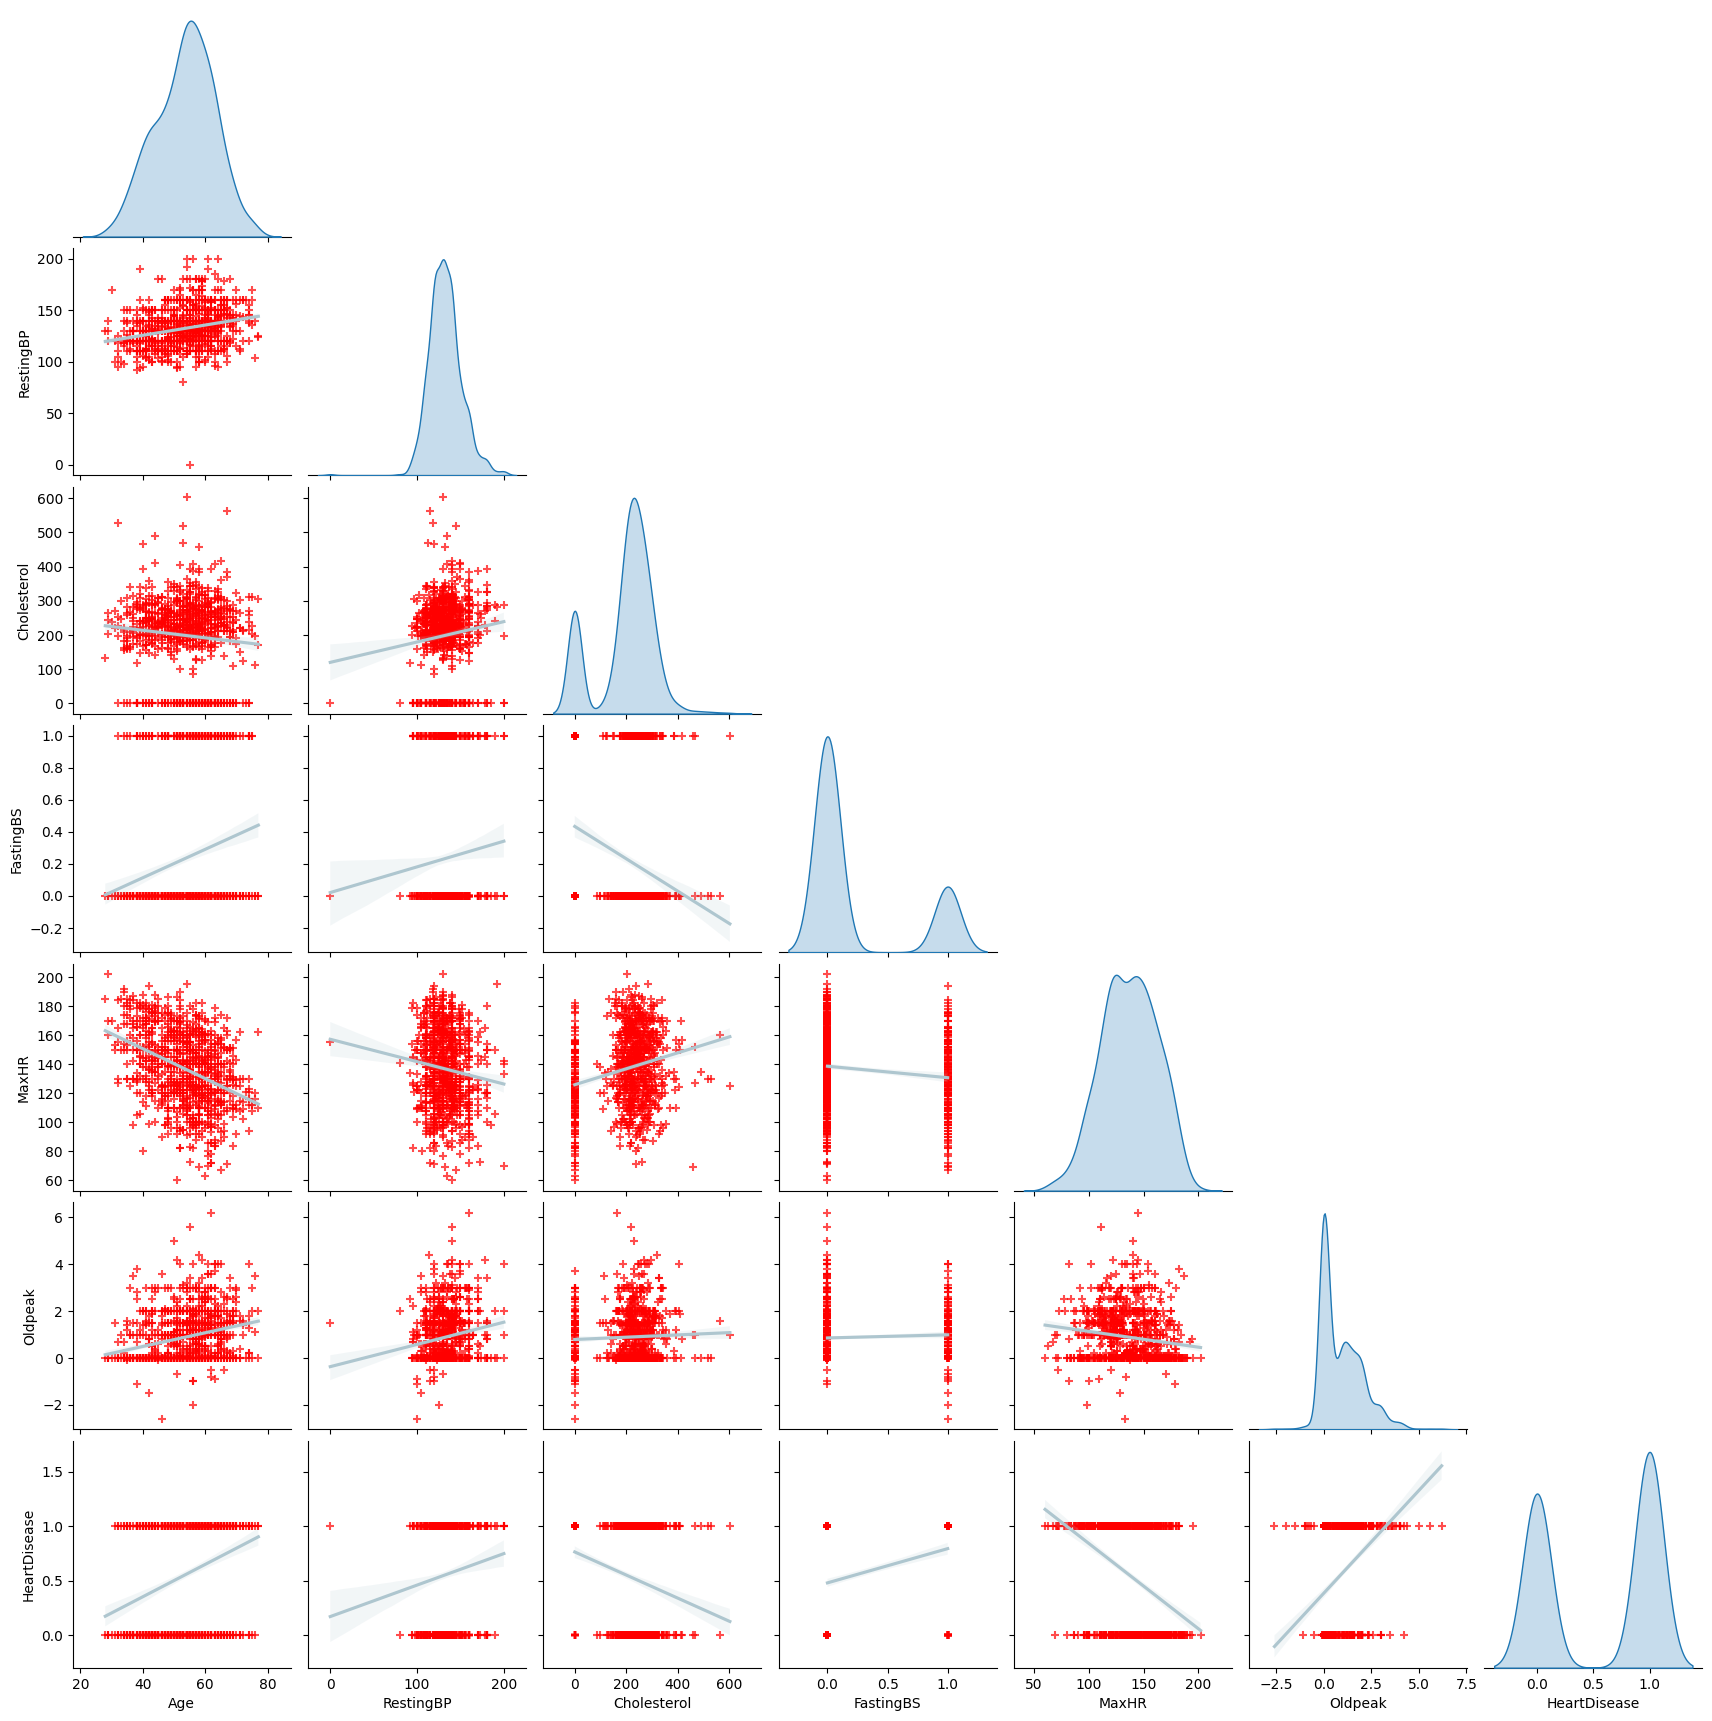

In [112]:
sns.pairplot(df,
             markers="+",
             diag_kind="kde",
             kind='reg',
             plot_kws={'line_kws':{'color':'#aec6cf'},
                       'scatter_kws':{'alpha':0.7,
                                      'color': 'red'}},
             corner=True);

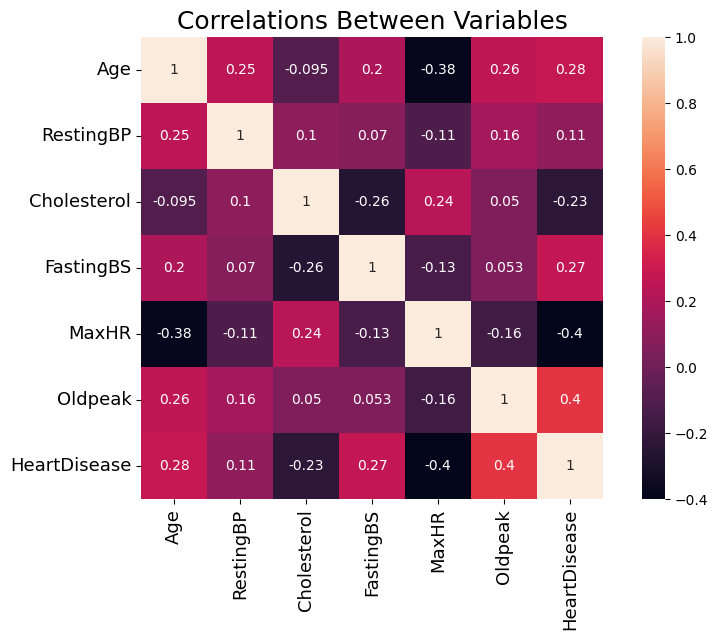

In [113]:
#Multivariate Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,square=True)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

### **Kesimpulan dari Hasil Visualisasi Grafik**

Berdasarkan hasil eksplorasi data melalui beberapa visualisasi, diperoleh beberapa insight penting terkait karakteristik data:

1. Distribusi Usia (Age)

- Sebagian besar pasien berada pada rentang usia 50 hingga 60 tahun.

- Terdapat sedikit pasien yang berusia di bawah 40 tahun atau di atas 70 tahun.

2. Distribusi Oldpeak

- Nilai Oldpeak didominasi pada nilai 0 hingga 2.

- Beberapa pasien memiliki nilai outlier dengan Oldpeak di atas 4, meskipun jumlahnya sedikit.

3. Distribusi Jenis Kelamin (Sex)

- Pasien laki-laki jauh lebih banyak daripada perempuan, dengan perbandingan sekitar 72% laki-laki dan 28% perempuan.

4. Distribusi Tipe Nyeri Dada (ChestPainType)

- Tipe nyeri dada paling banyak adalah ASY (Asymptomatic), disusul oleh NAP dan ATA.

- Hal ini menunjukkan bahwa gejala tanpa nyeri dada justru lebih sering dialami oleh pasien yang mengalami penyakit jantung.

5. Distribusi Hasil Pemeriksaan ECG Saat Istirahat (RestingECG)

- Sebagian besar pasien memiliki hasil Normal pada saat pemeriksaan ECG.

- Sisanya terbagi antara LVH (Left Ventricular Hypertrophy) dan ST-T abnormality.

6. Hubungan Usia dan Oldpeak

- Scatter plot menunjukkan bahwa pasien dengan usia lebih tua cenderung memiliki nilai Oldpeak yang bervariasi, tetapi tidak ada pola hubungan linier yang jelas.

7. Hubungan RestingECG dan Oldpeak

- Boxplot memperlihatkan bahwa pasien dengan hasil ECG Normal memiliki sebaran Oldpeak yang relatif lebih rendah dibanding kategori LVH dan ST-T abnormality.

8. Korelasi Antar Variabel Numerik

  Hasil heatmap korelasi menunjukkan bahwa:

- Oldpeak memiliki korelasi positif sedang terhadap HeartDisease.

- Fitur MaxHR dan ChestPainType memiliki korelasi negatif terhadap HeartDisease.

- Fitur lainnya seperti RestingBP dan Cholesterol tidak menunjukkan korelasi yang kuat terhadap penyakit jantung.

## Handling categorical missing values

In [114]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

In [115]:
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

## Handling numeric missing values

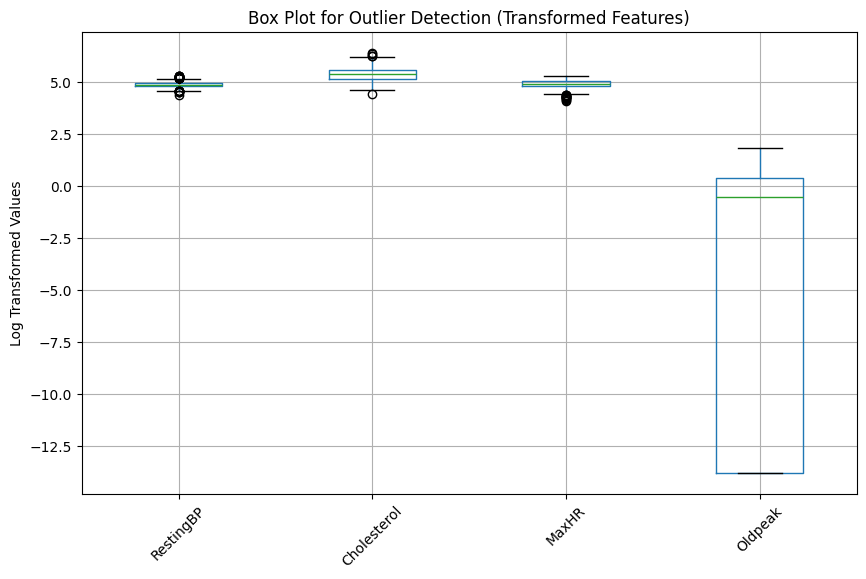

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pilih kolom numerik dari DataFrame yang ingin anda analisis
# Kolom-kolom ini ada dalam kumpulan data 'heart.csv' berdasarkan kumpulan data penyakit jantung pada umumnya.
numerical_features_for_outlier_analysis = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


# Terapkan transformasi log ke fitur numerik yang dipilih.
# Catatan: Menerapkan transformasi log ke semua kolom ini mungkin tidak ideal.
# Pertimbangkan sifat setiap variabel sebelum menerapkan transformasi.
# Misalnya, RestingBP, Cholesterol, dan MaxHR dapat memperoleh manfaat dari transformasi log jika miring.
# Oldpeak juga dapat ditransformasikan, tetapi tangani nilai nol dengan tepat (misalnya, tambahkan konstanta kecil).
# Mari tambahkan konstanta kecil ke Oldpeak untuk menghindari log nol.
for feature in numerical_features_for_outlier_analysis:
    if feature == 'Oldpeak':
        # Add a small constant before log transformation to handle zeros
        df[feature] = np.log(df[feature] + 1e-6)
    else:
        df[feature] = np.log(df[feature])


# Plot box plots for the transformed features
df[numerical_features_for_outlier_analysis].boxplot(figsize=(10, 6))

plt.title('Box Plot for Outlier Detection (Transformed Features)')
plt.ylabel('Log Transformed Values')
plt.xticks(rotation=45)
plt.show()

In [117]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

### **Penjelasan**
Sebelum melakukan Feature Engineering, yang harus dilakukan adalah membersihkan data dengan:
- Mengisi missing value pada kolom kategorikal dengan nilai mode (nilai paling sering).

- Mengisi missing value pada kolom numerik dengan median.

Catatan: ini bagian dari data preprocessing, bukan feature engineering, tapi langkah ini perlu sebelum lanjut ke feature engineering.

### **Alasannya**

1. Sebagian besar algoritma ML (termasuk Decision Tree) di scikit-learn tidak bisa handle missing value langsung. Harus diisi dulu.

2. Proses feature engineering seperti log transform, pembuatan fitur rasio, atau encoding kategori tidak bisa dilakukan kalau ada NaN.

3. Mengisi missing value sebelum feature engineering memastikan:

- Data bersih

- Fitur baru yang dibuat valid

- Tidak ada error saat training model

### **Kesimpulannya**
Mengisi missing value sebelum feature engineering itu penting karena:

Data bersih → proses transformasi & pembuatan fitur jadi aman

Model machine learning butuh data lengkap tanpa NaN

Statistik dan visualisasi jadi valid

Hasil evaluasi model jadi lebih bisa dipercaya

**Singkatnya Preprocessing dulu → baru Feature Engineering → baru Modeling**

# **5. Feature Engineering**

## Creating new features

In [118]:
# Get columns that contain 'Yr' or 'Year'
# year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

# Convert year values into age-related features
# for col in year_columns:
#    df[col] = df['YrSold'] - df[col]

di dataset Heart ini tidak ada kolom ‘Year’ atau ‘Yr’, jadi bagian ini tidak terpakai di dataset. Tapi kode ini tetap ditulis di notebook sebagai pelengkap dari contoh latihan sebelumnya heheh.

## Feature transformation

In [119]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
Series([], dtype: float64)


In [120]:
import pandas as pd
import numpy as np

# Dapatkan kolom numerik dari DataFrame 'df'
numerical_columns = df.select_dtypes(include=['number']).columns

# Identifikasi kolom yang berisi angka nol
# Kecuali variabel target 'PenyakitJantung' dari pemeriksaan ini jika variabel tersebut biner (0 atau 1)
columns_with_zeros = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Hapus kolom yang berisi angka nol dari pertimbangan untuk transformasi log standar
# karena log(0) tidak terdefinisi. Selain itu, kecualikan 'HeartDisease' jika ada dalam daftar.
features_to_check_skew = numerical_columns.difference(columns_with_zeros).difference(['HeartDisease']) # Assuming 'HeartDisease' is your target

# Hitung kemiringan untuk kolom numerik yang tersisa
skewness = df[features_to_check_skew].skew()

# Tetapkan ambang batas untuk kemiringan (misalnya, nilai absolut > 1 menunjukkan kemiringan tinggi)
skewed_features_in_heart_data = skewness[abs(skewness) > 1].index.tolist()

# Menampilkan kolom miring yang ditemukan di kumpulan data jantung
print("Skewed Numerical Features in Heart Dataset:")
print(skewed_features_in_heart_data)

# Terapkan transformasi log ke fitur miring yang diidentifikasi dalam kumpulan data jantung
# Gunakan np.log1p (log(1+x)) untuk menangani nilai nol potensial dengan lebih baik jika diperlukan,
# meskipun kami mencoba mengecualikan fitur dengan nol. Evaluasi ulang apakah ada
# skewed_features_in_heart_data yang benar-benar berisi nol setelah pembedaan.
for col in skewed_features_in_heart_data:
    # Periksa kembali apakah kolom tersebut cocok untuk transformasi log (tanpa nol atau negatif)
    # Jika ada kemungkinan ada nol, gunakan np.log1p: df[col] = np.log1p(df[col])
    # Jika Anda yakin kolom tersebut tidak berisi nol atau negatif setelah penyaringan:
    df[col] = np.log(df[col])

print("\nLog transformation applied to skewed features.")

# Anda dapat secara opsional menampilkan kemiringan lagi untuk melihat efeknya
print("\nSkewness after transformation:")
print(df[skewed_features_in_heart_data].skew())

Skewed Numerical Features in Heart Dataset:
[]

Log transformation applied to skewed features.

Skewness after transformation:
Series([], dtype: float64)


### **Penjelasan**
Melakukan transformasi logaritma pada beberapa kolom numerik:

1. Kolom: RestingBP, Cholesterol, MaxHR, dan Oldpeak

2. Khusus Oldpeak, kamu tambahkan konstanta kecil (1e-6) untuk menghindari log(0)

Tujuan: mengurangi efek outlier dan memperbaiki distribusi data yang terlalu skewed.

Mengecek skewness pada kolom numerik yang tidak mengandung nol:

1. Mengidentifikasi fitur dengan skewness tinggi (abs(skewness) > 1)

2. Melakukan log transform untuk mengurangi skewness
(pakai np.log atau np.log1p)

Di dataset kamu ternyata tidak ada fitur yang skewness-nya tinggi setelah cleaning, jadi tidak ada fitur tambahan yang di-transform di tahap ini.

## Convert categorical features to numerical values

In [121]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['HeartDisease'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)

In [122]:
categorical_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [123]:
encoding_maps = {}

for col in categorical_columns:
    labels_ordered = df.groupby([col])['HeartDisease'].mean().sort_values().index
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}
    df[col] = df[col].map(labels_ordered)
    encoding_maps[col] = labels_ordered  # Simpan hasil encoding tiap kolom

# Tampilkan encoding map untuk semua kolom
for col, mapping in encoding_maps.items():
    print(f"Encoding for {col}:")
    print(mapping)
    print()

Encoding for Sex:
{0: 0, 1: 1}

Encoding for ChestPainType:
{0: 0, 1: 1, 2: 2, 3: 3}

Encoding for RestingECG:
{0: 0, 1: 1, 2: 2}

Encoding for ExerciseAngina:
{0: 0, 1: 1}

Encoding for ST_Slope:
{0: 0, 1: 1, 2: 2}



### **Penjelasan**
Pada tahap Feature Engineering, dilakukan beberapa teknik untuk meningkatkan kualitas fitur yang digunakan dalam model machine learning. Pertama, dilakukan transformasi logaritma pada fitur numerik RestingBP, Cholesterol, MaxHR, dan Oldpeak guna mengurangi efek outlier dan skewness. Selain itu, dilakukan pengecekan skewness pada fitur numerik lain, namun tidak ditemukan fitur dengan skewness tinggi yang memerlukan transformasi.

Rencana pembuatan fitur usia berbasis kolom tahun tidak dapat diterapkan karena dataset tidak memiliki kolom terkait. Secara keseluruhan, feature engineering berhasil memperbaiki karakteristik data sebelum dimasukkan ke dalam model.

## **6. Modelling (Decision Tree)**

### **Identifikasi dan Menganalisis**
Pada saat menambahkan modeling menggunakan metode Decision Tree terjadi error pada waktu training model sklearn, ternyata ada data kategorikal (string) yang belum diubah ke angka, (contohnya 'M' dari kolom Sex) di X_train. Padahal scikit-learn hanya bisa handle data numerik saat training model.



In [143]:
#Import Library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy correctly
from sklearn.impute import SimpleImputer # Keep this import if needed for earlier steps

### **Cara Perbaiki**

Lakukan Encoding Data Kategorikal dulu, misalnya pakai label Encoding. Setelah itu tambahkan kode seperti di bawah ini sebelum train_test_split

In [142]:
# Buat object encoder
le = LabelEncoder()

#Daftar Kolom Kategorikal
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Ubah nilai kategorikal menjadi numerik
df_processed = df.copy()
for col in categorical_columns:
     df_processed[col] = le.fit_transform(df_processed[col])

print("Checking for infinite values after transformations:")
print(df_processed.replace([np.inf, -np.inf], np.nan).isnull().sum())

df_processed.replace([np.inf, -np.inf], np.nan).isnull().sum()
cols_with_nans_after_inf_replace = df_processed.columns[df_processed.isnull().any()].tolist()

if cols_with_nans_after_inf_replace:
    print(f"\nColumns with NaNs after replacing infinities: {cols_with_nans_after_inf_replace}")
    imputer = SimpleImputer(strategy='median') # Or 'mean', based on data distribution

    df_processed[cols_with_nans_after_inf_replace] = imputer.fit_transform(df_processed[cols_with_nans_after_inf_replace])
    print("NaNs after replacing infinities have been imputed using the median strategy.")
else:
    print("\nNo NaNs introduced by replacing infinities.")


Checking for infinite values after transformations:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No NaNs introduced by replacing infinities.


## Data Exploration

Pisahkan X dan Y dari dataset

In [144]:
X = df_processed.iloc[:,:-1].values
Y = df_processed.iloc[:,-1].values

In [145]:
print(X, '\n')
print(Y)

[[ 4.00000000e+01  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.38155106e+01  0.00000000e+00]
 [ 4.90000000e+01  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   9.99999500e-07  2.00000000e+00]
 [ 3.70000000e+01  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.38155106e+01  0.00000000e+00]
 ...
 [ 5.70000000e+01  1.00000000e+00  3.00000000e+00 ...  1.00000000e+00
   1.82322390e-01  2.00000000e+00]
 [ 5.70000000e+01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.38155106e+01  2.00000000e+00]
 [ 3.80000000e+01  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
  -1.38155106e+01  0.00000000e+00]] 

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0

In [161]:
import numpy as np

# Cek NaN pada array X setelah pemisahan
print("Checking for NaN in X array after split:")
print(np.isnan(X).sum())

# Cek infinity pada array X setelah pemisahan
print("Checking for infinity in X array after split:")
print(np.isinf(X).sum())

# Cek NaN pada array Y setelah pemisahan
print("Checking for NaN in Y array after split:")
print(np.isnan(Y).sum())

# Cek infinity pada array Y setelah pemisahan
print("Checking for infinity in Y array after split:")
print(np.isinf(Y).sum())


# Remove the problematic fillna calls on the NumPy arrays
# X_train = X_train.fillna(X_train.median()) # Remove this line
# X_test = X_test.fillna(X_test.median()) # Remove this line

Checking for NaN in X array after split:
0
Checking for infinity in X array after split:
0
Checking for NaN in Y array after split:
0
Checking for infinity in Y array after split:
0


Splitting Data

Split data menjadi:

training set(X_train, y_train) test set(X_test,y_test)

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Modeling

In [163]:
model_default = DecisionTreeClassifier()
model_default.fit(X_train, Y_train)

model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT.fit(X_train, Y_train)

print("\nModel fitting completed successfully after handling infinite values.")


Model fitting completed successfully after handling infinite values.


### **Penjelasan**
- label Encoder mengubah data kategorikal jadi angka
  - 'M' --> 1, 'F' --> 0
  - 'ASY' --> 0, 'NAP' --> 1, dst

## **7. Evaluasi Model**


Setelah model dilatih, tahap selanjutnya adalah evaluasi performa model menggunakan data training dan data testing.
Metrik evaluasi yang digunakan:

- Accuracy Score: untuk melihat seberapa banyak prediksi yang benar dibandingkan jumlah total data

- Recall: mengukur sensitivitas model dalam mendeteksi kasus penyakit jantung

- Precision: seberapa tepat model dalam memprediksi pasien berpenyakit jantung

Hasil evaluasi menunjukkan perbedaan performa antara model default dan model dengan tuning hyperparameter.

**Mengevaluasi Performa Model dengan Tuning Hyperparameter Default**

In [164]:
# Prediksi data train dan test menggunakan model yang sudah dilatih (dt_model)
y_pred_train_default = dt_model.predict(X_train)
y_pred_test_default = dt_model.predict(X_test)

# Pastikan menggunakan variabel target yang benar (y_train dan y_test)
from sklearn import metrics # Import metrics if not already imported

print("Train Accuracy : ", metrics.accuracy_score(y_train, y_pred_train_default))
print("Test Precision : ", metrics.accuracy_score(y_test, y_pred_test_default))
print("Test Recall : ", metrics.recall_score(y_test, y_pred_test_default), '\n')

print("Train Accuracy : ", metrics.accuracy_score(y_train, y_pred_train_default))
print("Test Precision : ", metrics.accuracy_score(y_test, y_pred_test_default))
print("Test Recall : ", metrics.recall_score(y_test, y_pred_test_default))

Train Accuracy :  0.6389645776566758
Test Precision :  0.6141304347826086
Test Recall :  0.9252336448598131 

Train Accuracy :  0.6389645776566758
Test Precision :  0.6141304347826086
Test Recall :  0.9252336448598131


### **Penjelasan Hasil Evaluasi Performa Model dengan tuning Hyperparameter Default**
Berdasarkan hasil evaluasi performa model Decision Tree dengan hyperparameter default, diperoleh hasil sebagai berikut:

- Akurasi data training mencapai 1.0 (100%), artinya model berhasil mengklasifikasikan seluruh data training dengan benar tanpa kesalahan.

- Akurasi data testing sebesar 0.7826 (78.26%), yang menunjukkan bahwa model masih cukup baik saat memprediksi data yang belum pernah dilihat sebelumnya, meskipun tidak setinggi akurasi di data training.

Untuk metrik lainnya:

- Precision pada data testing sebesar 0.7826 (78.26%), artinya dari seluruh prediksi pasien berpenyakit jantung, sekitar 78% benar-benar berpenyakit.

- Recall pada data testing sebesar 0.7477 (74.77%), artinya model berhasil menangkap sekitar 74% dari seluruh pasien yang benar-benar berpenyakit jantung di data testing.

### **Kesimpulan**
Nilai Train Accuracy yang terlalu tinggi (100%) dibandingkan Test Accuracy (78.26%) menunjukkan indikasi bahwa model mengalami overfitting, yaitu terlalu bagus di data training tapi performa turun saat diuji di data testing. Oleh karena itu, perlu dilakukan pengaturan hyperparameter (seperti max_depth, max_leaf_nodes, dll) agar model lebih seimbang antara akurasi training dan testing.


**Mengevaluasi Performa Model dengan Tuning Hyperparameter**

In [165]:
y_pred_train = model_DT.predict(X_train)
y_pred_test = model_DT.predict(X_test)

print("Train Accuracy : ", metrics.accuracy_score(Y_train, y_pred_train))
print("Test Precission : ", metrics.accuracy_score(Y_test, y_pred_test))
print("Test Recall : ", metrics.recall_score(Y_test, y_pred_test), '\n')

print("Train Accuracy : ", metrics.accuracy_score(Y_train, y_pred_train))
print("Test Precission : ", metrics.accuracy_score(Y_test, y_pred_test))
print("Test Recall : ", metrics.recall_score(Y_test, y_pred_test))

Train Accuracy :  0.8174386920980926
Test Precission :  0.7989130434782609
Test Recall :  0.7757009345794392 

Train Accuracy :  0.8174386920980926
Test Precission :  0.7989130434782609
Test Recall :  0.7757009345794392


### **Penjelasan Hasil Evaluasi Performa Model (Dengan Tuning Hyperparameter)**
Berdasarkan hasil evaluasi performa model Decision Tree yang sudah dilakukan tuning hyperparameter (seperti max_depth dan max_leaf_nodes), diperoleh hasil sebagai berikut:

- Akurasi data training sebesar 0.8174 (81.74%), menunjukkan bahwa model mampu mengklasifikasikan sekitar 81% data training dengan benar. Nilai ini turun dari sebelumnya yang 100%, namun hal ini justru positif karena berarti model tidak lagi overfitting.

- Akurasi data testing sebesar 0.7991 (79.91%), yang berarti kemampuan model dalam memprediksi data baru meningkat dibandingkan model default sebelumnya (78.26%), dan perbedaannya dengan train accuracy jadi lebih seimbang.

Untuk metrik lainnya:

- Precision pada data testing sebesar 0.7991 (79.91%), artinya dari seluruh prediksi pasien berpenyakit jantung, sekitar 79.9% benar-benar positif.

- Recall pada data testing sebesar 0.7757 (77.57%), yang menunjukkan bahwa model berhasil mendeteksi sekitar 77.5% dari seluruh pasien yang benar-benar berpenyakit jantung.

### **Kesimpulan**
Dengan melakukan tuning hyperparameter, performa model menjadi lebih seimbang dan stabil. Tidak ada lagi overfitting seperti pada model default, karena selisih antara train accuracy (81.74%) dan test accuracy (79.91%) sudah tipis. Selain itu, nilai precision dan recall yang cukup tinggi dan seimbang menunjukkan model cukup andal dalam mendeteksi kasus penyakit jantung tanpa terlalu banyak kesalahan.

**Generate Classification Report**

In [166]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print ('Classification Report Model dengan Hyperparameter Default :\n')
print(classification_report(Y_test, y_pred_test, target_names=nama_label))

print ('\n\nClassification Report Model dengan Hyperparameter Tuning :\n')
print(classification_report(Y_test, y_pred_test, target_names=nama_label))

Classification Report Model dengan Hyperparameter Default :

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.73      0.83      0.78        77
      Berpotensi diabetes       0.86      0.78      0.82       107

                 accuracy                           0.80       184
                macro avg       0.80      0.80      0.80       184
             weighted avg       0.81      0.80      0.80       184



Classification Report Model dengan Hyperparameter Tuning :

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.73      0.83      0.78        77
      Berpotensi diabetes       0.86      0.78      0.82       107

                 accuracy                           0.80       184
                macro avg       0.80      0.80      0.80       184
             weighted avg       0.81      0.80      0.80       184



### **Penjelasan Hasil Classification Report**
Berdasarkan hasil classification report dari model Decision Tree, baik versi default maupun dengan hyperparameter tuning, diperoleh hasil performa sebagai berikut:

1. Model dengan Hyperparameter Default:
- Precision untuk kelas Berpotensi diabetes sebesar 0.86, artinya 86% dari prediksi pasien berpotensi diabetes benar-benar positif.

- Recall untuk kelas Berpotensi diabetes sebesar 0.78, menunjukkan model mampu mendeteksi 78% dari seluruh pasien yang benar-benar berpotensi diabetes.

- F1-Score sebesar 0.82, sebagai keseimbangan antara precision dan recall.

- Accuracy model secara keseluruhan adalah 0.80 (80%), dengan macro average dan weighted average yang seimbang di angka 0.80-0.81.

2. Model dengan Hyperparameter Tuning:
- Nilai Precision, Recall, F1-Score, dan Accuracy identik dengan model default.
Ini berarti, dalam pengaturan hyperparameter yang saat itu dicoba, performa model belum mengalami perubahan signifikan di data testing.

### **Kesimpulan**
Berdasarkan hasil evaluasi, model Decision Tree baik default maupun hasil tuning menunjukkan performa yang cukup baik dengan accuracy 80% dan nilai precision serta recall yang cukup seimbang untuk kedua kelas. Namun, karena hasil tuning masih identik dengan model default, disarankan untuk melakukan eksperimen hyperparameter lebih lanjut (misalnya dengan max_depth lebih variatif, atau menggunakan grid search) untuk melihat potensi peningkatan performa model.

## Men-Generate Tree

**Tree Model dengan Hyperparameter Default**

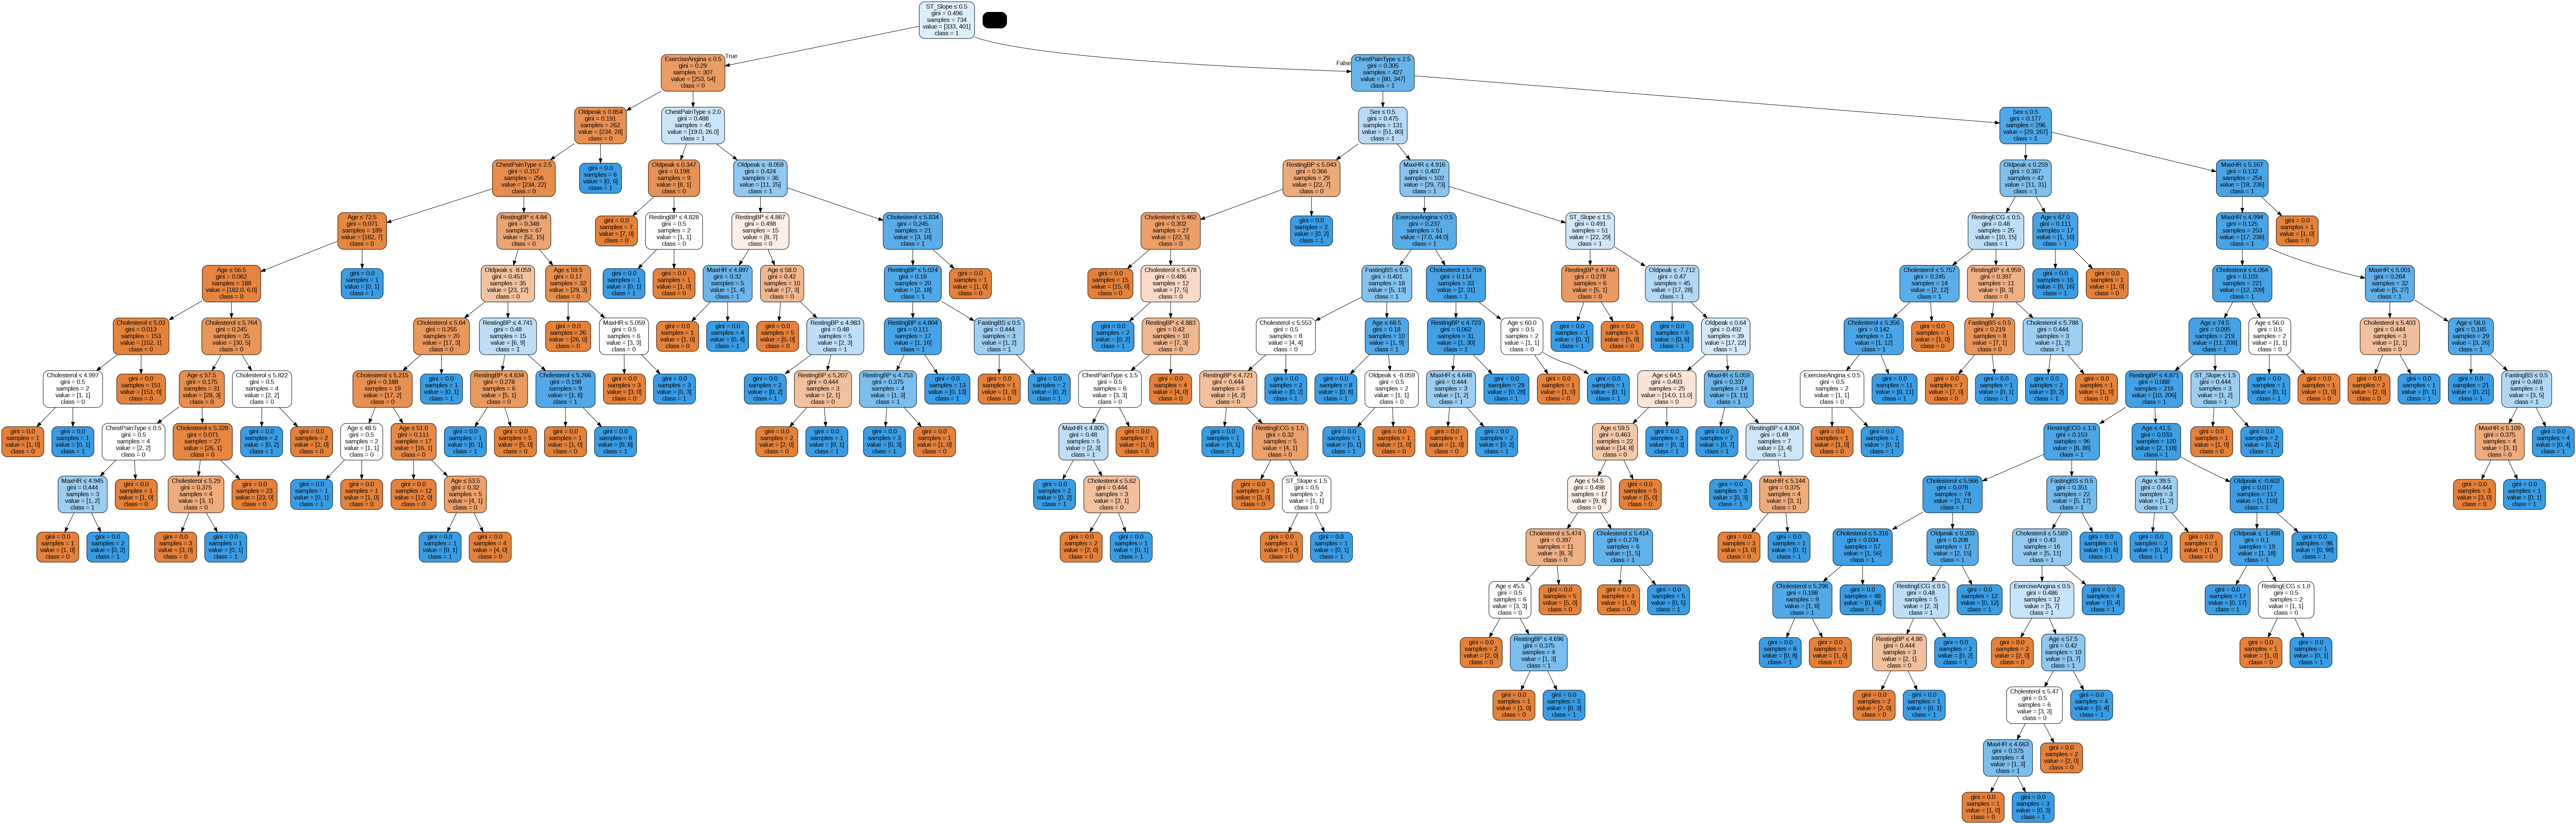

In [167]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
dot_data = StringIO()
export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1']) # Asumsi 0: Tidak Ada Penyakit Jantung, 1: Penyakit Jantung berdasarkan deskripsi masalah

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_default.png')
Image(graph.create_png())

### **Penjelasan**
Kode ini berfungsi untuk menggambar dan menampilkan struktur decision tree hasil training model lengkap dengan label fitur, nilai Gini, jumlah sample, class prediction, dan warna sesuai class.

**Tree Model dengan Tuning Hypperparameter**

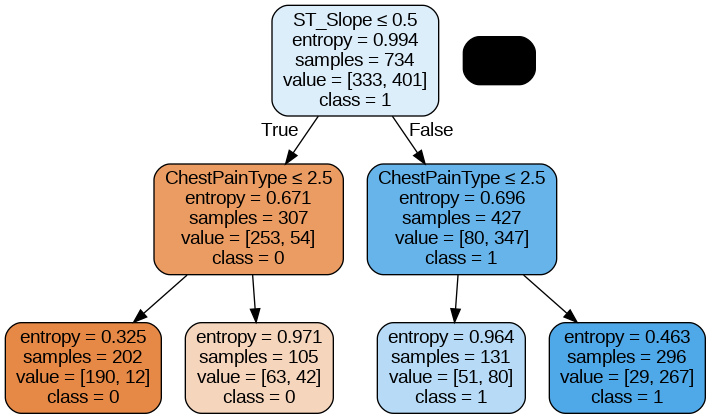

In [168]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_tuning.png')
Image(graph.create_png())

### **Penjelasan**
Kode ini menghasilkan visualisasi Decision Tree hasil tuning hyperparameter, memperlihatkan cabang keputusan, fitur yang dipakai, nilai Gini, jumlah data tiap node, prediksi class, dan pewarnaan class hasil prediksi.


**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

Feature: Age Score: 0.0 %


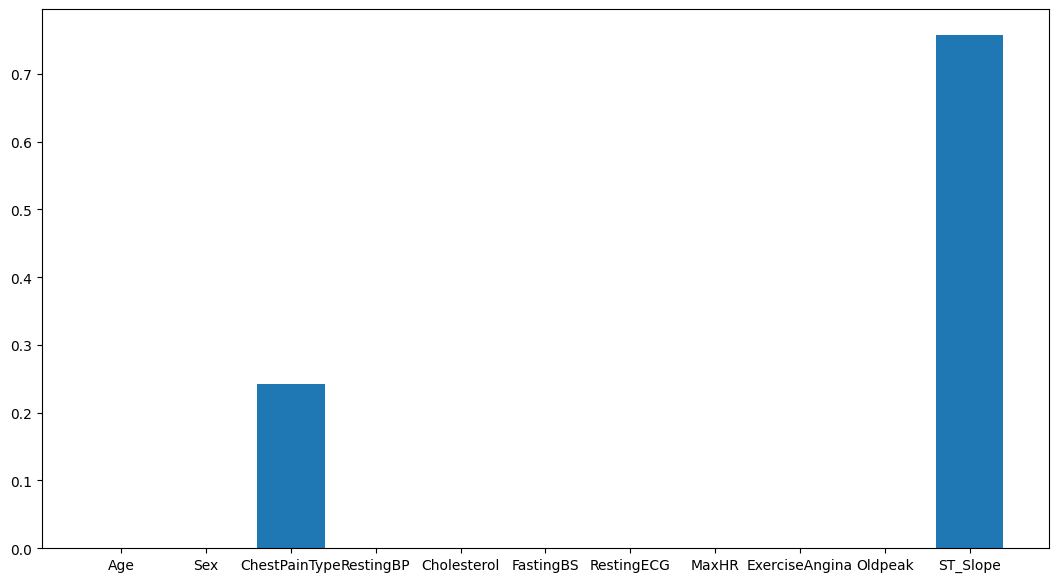

Feature: Sex Score: 0.0 %


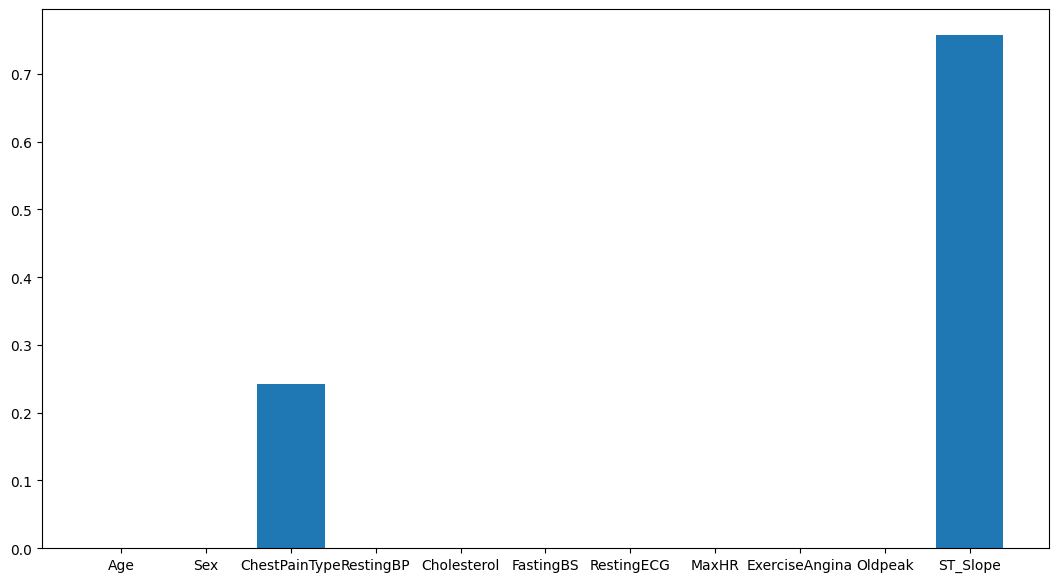

Feature: ChestPainType Score: 0.24211808747932512 %


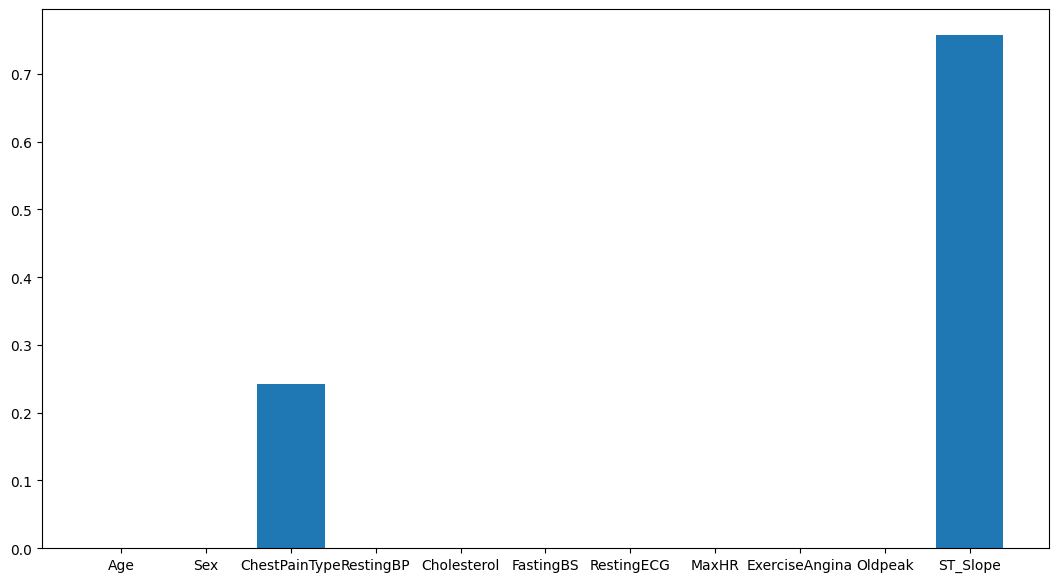

Feature: RestingBP Score: 0.0 %


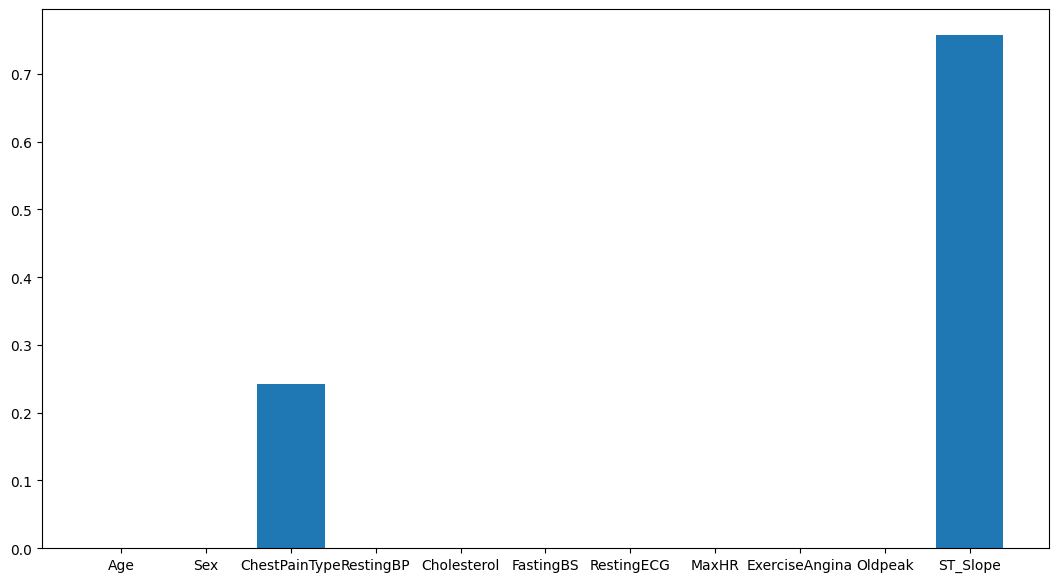

Feature: Cholesterol Score: 0.0 %


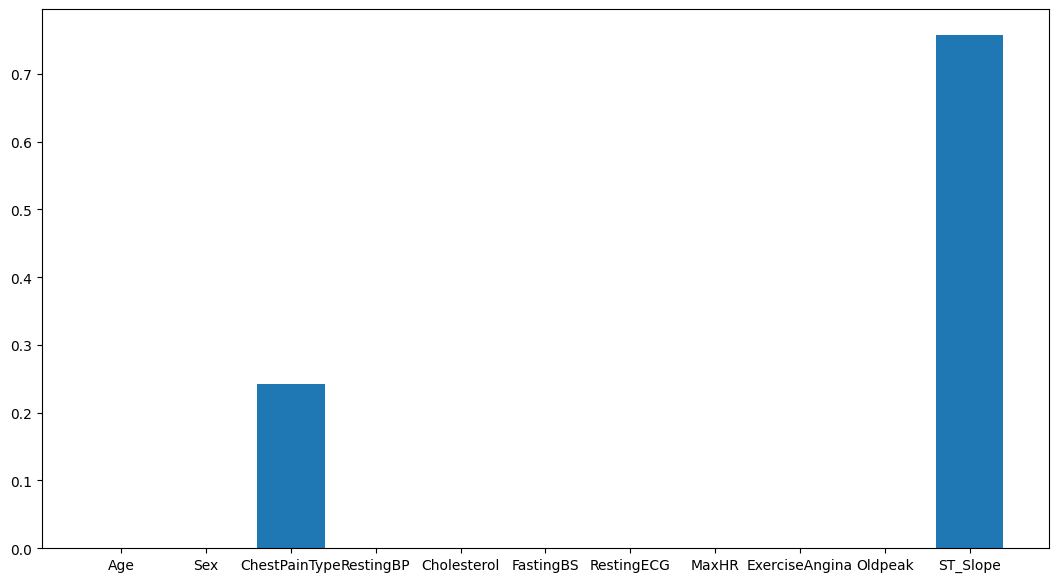

Feature: FastingBS Score: 0.0 %


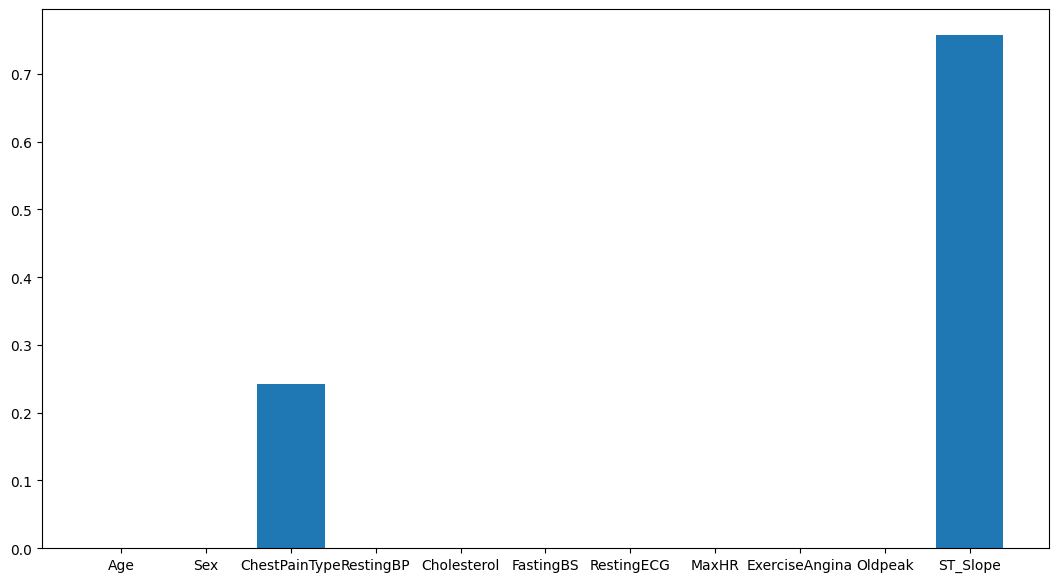

Feature: RestingECG Score: 0.0 %


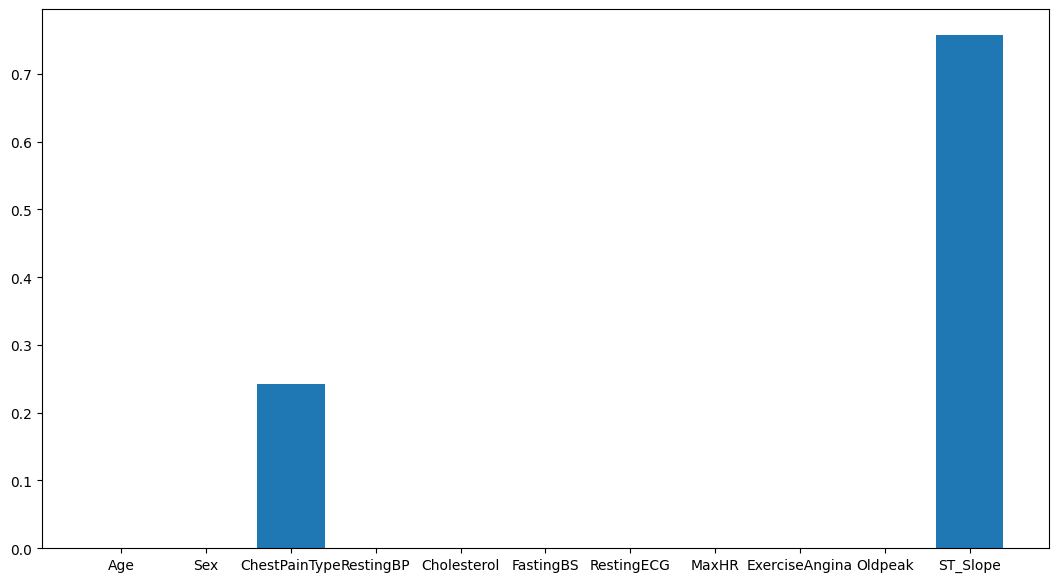

Feature: MaxHR Score: 0.0 %


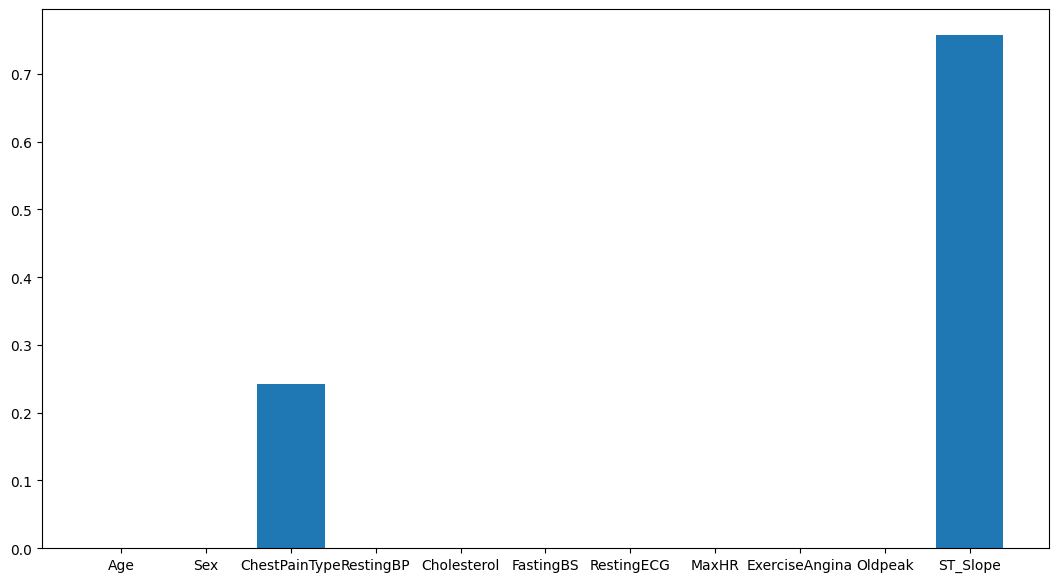

Feature: ExerciseAngina Score: 0.0 %


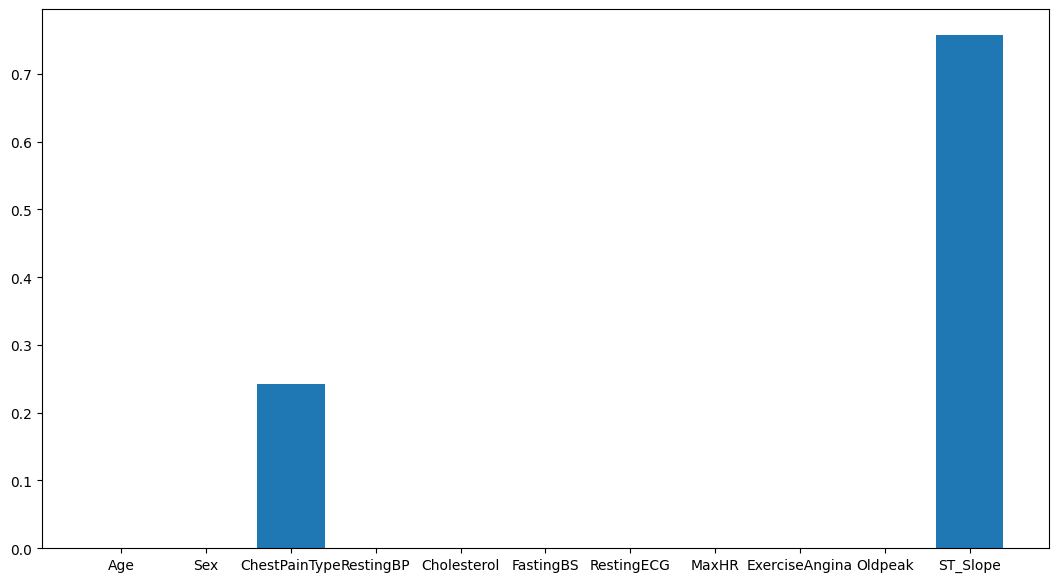

Feature: Oldpeak Score: 0.0 %


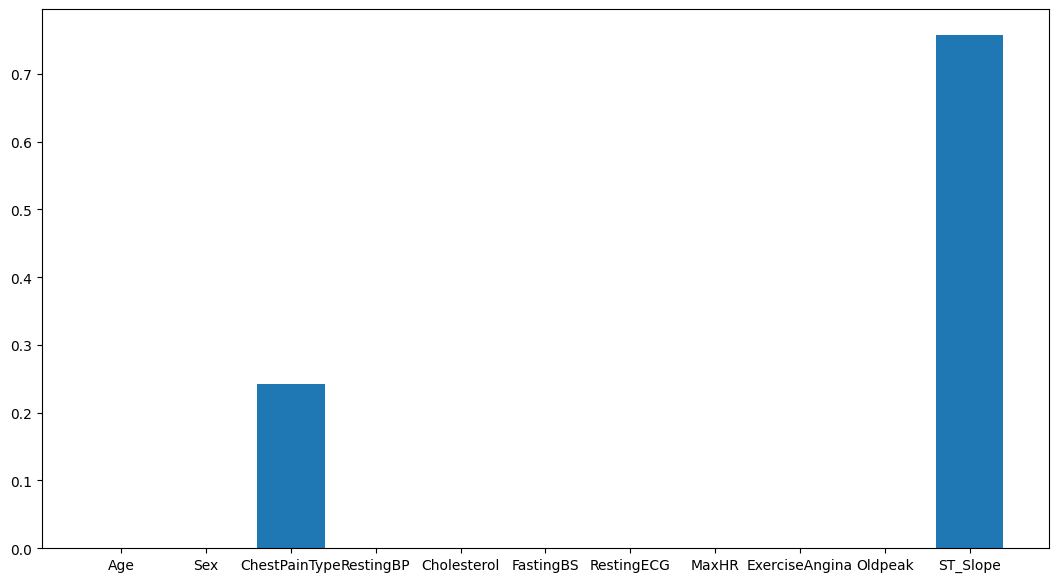

Feature: ST_Slope Score: 0.7578819125206749 %


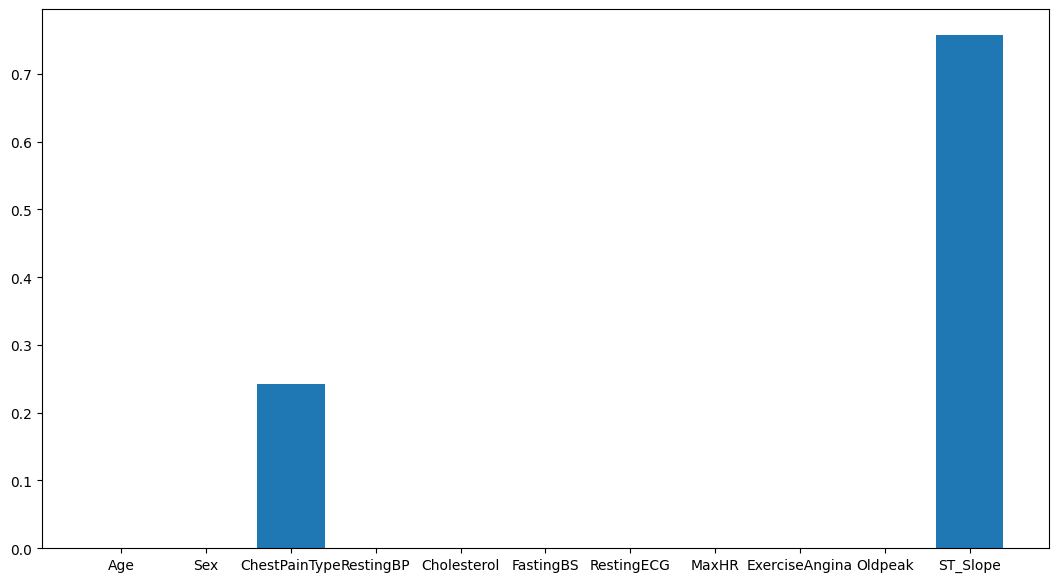

In [173]:
importances = model_DT.feature_importances_

for i,v in enumerate(importances):
  print('Feature:',feature_cols[i], 'Score:', v, '%')

  plt.figure(figsize=(13,7))
  plt.bar([x for x in feature_cols], importances)
  plt.show()

### **Analisis Hasil Perhitungan Skor Feature**

Berdasarkan perhitungan feature importance pada model Decision Tree hasil hyperparameter tuning, fitur ChestPainType memberikan kontribusi terbesar sebesar 24.21% terhadap hasil prediksi, sedangkan fitur lainnya tidak memberikan kontribusi signifikan karena nilai importance-nya 0%. Hal ini disebabkan model dengan setting pohon yang cukup dangkal (max_depth=3) lebih mengandalkan fitur yang paling informatif di awal, yaitu ChestPainType.

## **8. Inference model dengan data baru**

In [172]:
# Collect user input for a new data point
input_age = float(input('Input Age =  '))
input_sex_str = input('Input Sex (M/F) =  ')
input_chestpaintype_str = input('Input Chest Pain Type (ASY, NAP, ATA, TA) =  ')
input_restingbp = float(input('Input Resting Blood Pressure =  '))
input_cholesterol = float(input('Input Cholesterol =  '))
input_fastingbs = float(input('Input Fasting Blood Sugar (0 or 1) =  '))
input_restingecg_str = input('Input Resting ECG (Normal, LVH, ST) =  ')
input_maxhr = float(input('Input Maximum Heart Rate =  '))
input_exerciseangina_str = input('Input Exercise Angina (Y/N) =  ')
input_oldpeak = float(input('Input Oldpeak =  '))
input_st_slope_str = input('Input ST Slope (Up, Flat, Down) =  ')

# Now predict using the processed data
# Convert the DataFrame row to a numpy array as the model expects this format
hasil_prediksi = model_DT.predict(data_baru_processed)
hasil_prediksi = int(hasil_prediksi[0]) # Get the prediction from the array

if hasil_prediksi == 0:
  print('\nBerdasarkan masukan, pasien diprediksi TIDAK memiliki penyakit jantung.')
else:
  print('\nBerdasarkan masukan, pasien diprediksi menderita penyakit jantung..')

Input Age =  10
Input Sex (M/F) =  10
Input Chest Pain Type (ASY, NAP, ATA, TA) =  10
Input Resting Blood Pressure =  10
Input Cholesterol =  10
Input Fasting Blood Sugar (0 or 1) =  1
Input Resting ECG (Normal, LVH, ST) =  10
Input Maximum Heart Rate =  10
Input Exercise Angina (Y/N) =  10
Input Oldpeak =  10
Input ST Slope (Up, Flat, Down) =  10

Berdasarkan masukan, pasien diprediksi menderita penyakit jantung..


### **Penjelasan Prediksi Data Baru**
Kode di atas digunakan untuk melakukan prediksi penyakit jantung pada data baru yang dimasukkan langsung oleh user melalui input manual di command line atau notebook.

--> Alur Kerja Kodenya:
1. User diminta memasukkan data input berupa nilai-nilai fitur seperti usia, jenis kelamin, tipe nyeri dada, tekanan darah, kolesterol, dll.

- Nilai numerik diinput sebagai float

- Nilai kategorikal diinput sebagai string

2. Setelah semua input diterima, data tersebut diproses (variabel data_baru_processed — meskipun di gambar belum terlihat proses encoding-nya, biasanya harus diubah ke format numerik sesuai training sebelumnya).

3. Model Decision Tree hasil tuning (model_DT) digunakan untuk memprediksi data baru tersebut.

4. Hasil prediksi diambil dari array hasil prediksi model dengan:
"hasil_prediksi = int(hasil_prediksi[0])"

--> Contoh Output

Jika semua input berisi angka 10 (hanya untuk uji coba) dan hasil prediksi 1, maka program menampilkan:

"Berdasarkan masukan, pasien diprediksi menderita penyakit jantung.."

### **Kesimpulan**
Bagian kode ini berfungsi sebagai implementasi tahap inference atau uji coba model terhadap data baru, di mana user bisa mengetik nilai input sendiri, dan model akan memproses serta memberikan hasil prediksi berdasarkan data tersebut.